In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd

In [9]:
# Load the dataset
df = pd.read_csv('wikidata5m_multiling_en2_42k_desc.csv')

# Split the dataset into training and a temporary set with an 80:20 ratio
train, temp = train_test_split(df, test_size=0.2, random_state=42)

# Split the temporary set into validation and test sets with a 50:50 ratio
valid, test = train_test_split(temp, test_size=0.5, random_state=42)

# Save the training, validation, and test sets to new CSV files
train.to_csv('wikidata5m_multiling_en2_42k_desc_train.csv', index=False)
valid.to_csv('wikidata5m_multiling_en2_42k_desc_valid.csv', index=False)
test.to_csv('wikidata5m_multiling_en2_42k_desc_test.csv', index=False)

# Print the sizes of the training, validation, and test sets
print(f"Training set size: {len(train)}")
print(f"Validation set size: {len(valid)}")
print(f"Test set size: {len(test)}")

Training set size: 33593
Validation set size: 4199
Test set size: 4200


In [4]:
import pandas as pd

# Load the TSV file
tsv_file = 'wikidata5m_top200_en_42k_descriptions_truncated.tsv'
csv_file = 'wikidata5m_top200_en_42k_descriptions_truncated.csv'

# Read TSV and write to CSV
df = pd.read_csv(tsv_file, sep='\t')
df.to_csv(csv_file, index=False)

print(f"✅ Converted {tsv_file} to {csv_file}")


✅ Converted wikidata5m_top200_en_42k_descriptions_truncated.tsv to wikidata5m_top200_en_42k_descriptions_truncated.csv


In [7]:
# Load the dataset
df = pd.read_csv('wikidata5m_top200_ru_42k_descriptions_truncated.csv')

# Split the dataset into training and a temporary set with an 80:20 ratio
train, temp = train_test_split(df, test_size=0.2, random_state=42)

# Split the temporary set into validation and test sets with a 50:50 ratio
valid, test = train_test_split(temp, test_size=0.5, random_state=42)

# Save the training, validation, and test sets to new CSV files
train.to_csv('wikidata5m_multiling_ru_42k_descriptions_truncated_train.csv', index=False)
valid.to_csv('wikidata5m_multiling_ru_42k_descriptions_truncated_valid.csv', index=False)
test.to_csv('wikidata5m_multiling_ru_42k_descriptions_truncated_test.csv', index=False)

# Print the sizes of the training, validation, and test sets
print(f"Training set size: {len(train)}")
print(f"Validation set size: {len(valid)}")
print(f"Test set size: {len(test)}")

Training set size: 33552
Validation set size: 4194
Test set size: 4194


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

def count_unique_entities_csv(file_path):
    df = pd.read_csv(file_path)
    subjects = set(df['subject_id'])
    objects = set(df['object_id'])
    return len(subjects.union(objects))

def count_unique_subjects_csv(file_path):
    df = pd.read_csv(file_path)
    return df['subject_id'].nunique()

def count_unique_objects_csv(file_path):
    df = pd.read_csv(file_path)
    return df['object_id'].nunique()

def count_unique_relations_csv(file_path):
    df = pd.read_csv(file_path)
    return df['relation_id'].nunique()

def count_unique_triples_csv(file_path):
    df = pd.read_csv(file_path)
    return df[['subject_id', 'relation_id', 'object_id']].drop_duplicates().shape[0]

def plot_relation_distribution_csv(file_path):
    df = pd.read_csv(file_path)
    relation_counts = df['relation_id'].value_counts()

    plt.figure(figsize=(10, 8))
    plt.hist(relation_counts.values, bins=20, color='green', edgecolor='black')
    plt.xlabel('Number of Triples per Relation')
    plt.ylabel('Number of Relations')
    plt.title('Histogram of Relation Occurrences in Knowledge Graph')
    plt.grid(True)
    plt.show()


Unique triples: 4200
Unique entities: 6689
Unique relations: 200
Unique subjects: 4194
Unique objects: 2510
Unique relations: 200


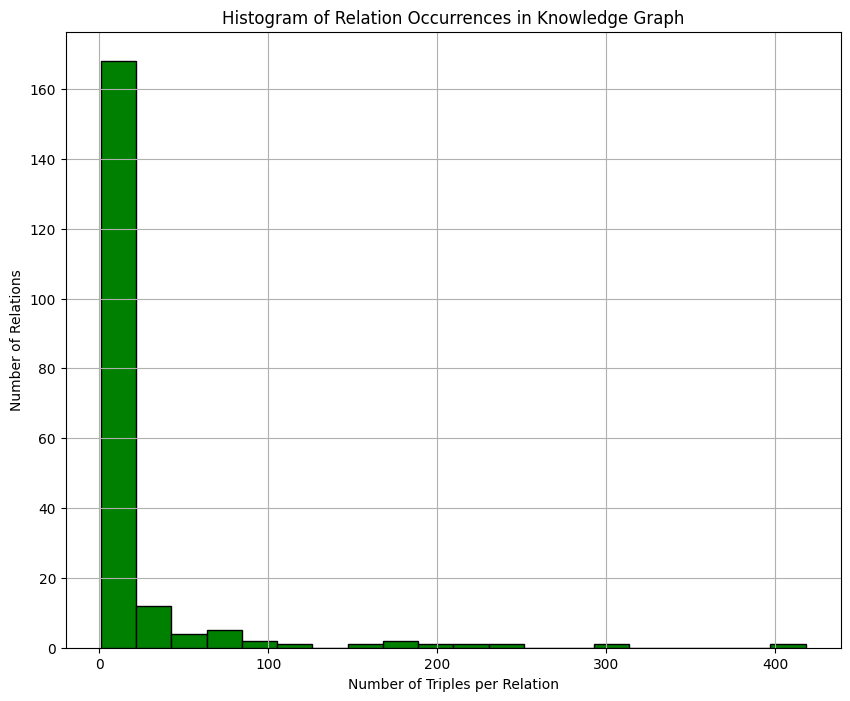

In [22]:
file_path = 'wikidata5m_multiling_ru_42k_descriptions_truncated_test.csv'

print("Unique triples:", count_unique_triples_csv(file_path))
print("Unique entities:", count_unique_entities_csv(file_path))
print("Unique relations:", count_unique_relations_csv(file_path))
print("Unique subjects:", count_unique_subjects_csv(file_path))
print("Unique objects:", count_unique_objects_csv(file_path))
print("Unique relations:", count_unique_relations_csv(file_path))


plot_relation_distribution_csv(file_path)



--- FULL DATASET STATISTICS ---
Unique triples: 41940
Unique entities: 52949
Unique relations: 200
Unique subjects: 39281
Unique objects: 15317


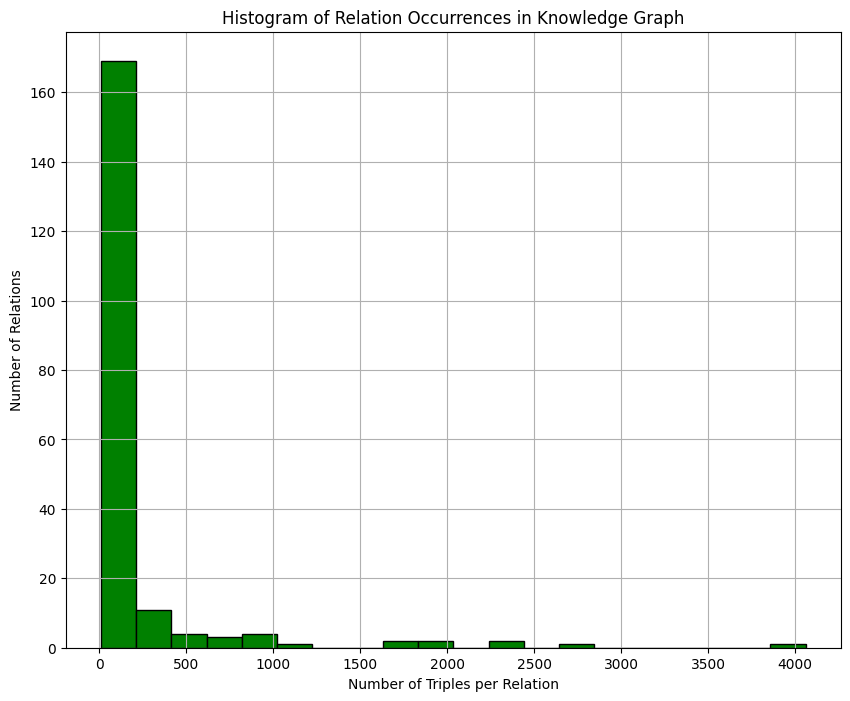

In [13]:
file_path_full = 'wikidata5m_top200_ru_42k_descriptions_truncated.csv'

print("\n--- FULL DATASET STATISTICS ---")
print("Unique triples:", count_unique_triples_csv(file_path_full))
print("Unique entities:", count_unique_entities_csv(file_path_full))
print("Unique relations:", count_unique_relations_csv(file_path_full))
print("Unique subjects:", count_unique_subjects_csv(file_path_full))
print("Unique objects:", count_unique_objects_csv(file_path_full))

plot_relation_distribution_csv(file_path_full)


In [ ]:
import pandas as pd

# Replace with your actual file name
input_file = 'relation_stats_top200_en_de_ru.tsv'
output_file = 'trimmed_file.tsv'

# Load the TSV file
df = pd.read_csv(input_file, sep='\t', header=None)

# Keep only the first 4 columns
df_trimmed = df.iloc[:, :4]

# Save the trimmed DataFrame back to a TSV file
df_trimmed.to_csv(output_file, sep='\t', index=False, header=False)

print(f"Trimmed file saved as: {output_file}")


Trimmed file saved as: trimmed_file.tsv


In [3]:

import nltk
from nltk.tokenize import sent_tokenize
import csv

nltk.download("punkt")            # one global download is sufficient

def keep_first_two_sentences(text, lang):
    sentences = sent_tokenize(text, language=lang)
    return " ".join(sentences[:2])

# Set file paths (example for German)
lang_code    = "en"                                    # "en", "de", or "ru"
input_file   = f"wikidata5m_top200_{lang_code}_42k_descriptions.tsv"
output_file  = f"wikidata5m_top200_{lang_code}_42k_descriptions_truncated.tsv"

language_map = {"en": "english", "de": "german", "ru": "russian"}
token_lang   = language_map[lang_code]

with open(input_file, encoding="utf-8") as infile, \
     open(output_file, "w", encoding="utf-8", newline="") as outfile:

    reader = csv.reader(infile, delimiter="\t")
    writer = csv.writer(outfile, delimiter="\t")

    header = next(reader)
    writer.writerow(header)

    for row in reader:
        if len(row) != 8:
            continue                                   # skip malformed rows
        subj_desc = keep_first_two_sentences(row[6], token_lang)
        obj_desc  = keep_first_two_sentences(row[7], token_lang)
        writer.writerow(row[:6] + [subj_desc, obj_desc])

print("✅ Truncated dataset saved:", output_file)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


THIS ONE!:

In [5]:
import nltk
from nltk.tokenize import sent_tokenize
import csv

nltk.download('punkt')
nltk.download('punkt_tab')

# Define your function to keep first two sentences
def keep_first_two_sentences(text):
    sentences = sent_tokenize(text)
    return ' '.join(sentences[:2])

# Set file paths
input_file = 'wikidata5m_top200_en_42k_descriptions.tsv'
output_file = 'wikidata5m_top200_en_42k_descriptions_truncated.tsv'

# Process the dataset
with open(input_file, 'r', encoding='utf-8') as infile, \
     open(output_file, 'w', encoding='utf-8', newline='') as outfile:

    reader = csv.reader(infile, delimiter='\t')
    writer = csv.writer(outfile, delimiter='\t')

    header = next(reader)
    writer.writerow(header)

    for row in reader:
        if len(row) != 8:
            # Skip malformed rows
            continue
        subj_desc = keep_first_two_sentences(row[6])
        obj_desc  = keep_first_two_sentences(row[7])
        writer.writerow(row[:6] + [subj_desc, obj_desc])

print("✅ The truncated dataset has been saved to:", output_file)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


✅ The truncated dataset has been saved to: wikidata5m_top200_en_42k_descriptions_truncated.tsv


In [2]:
import nltk
from nltk.tokenize import sent_tokenize
import csv

nltk.download("punkt")            # one global download is sufficient

def keep_first_two_sentences(text, lang):
    sentences = sent_tokenize(text, language=lang)
    return " ".join(sentences[:2])

# Set file paths (example for German)
lang_code    = "ru"                                    # "en", "de", or "ru"
input_file   = f"wikidata5m_top200_{lang_code}_42k_descriptions.tsv"
output_file  = f"wikidata5m_top200_{lang_code}_42k_descriptions_truncated.tsv"

language_map = {"en": "english", "de": "german", "ru": "russian"}
token_lang   = language_map[lang_code]

with open(input_file, encoding="utf-8") as infile, \
     open(output_file, "w", encoding="utf-8", newline="") as outfile:

    reader = csv.reader(infile, delimiter="\t")
    writer = csv.writer(outfile, delimiter="\t")

    header = next(reader)
    writer.writerow(header)

    for row in reader:
        if len(row) != 8:
            continue                                   # skip malformed rows
        subj_desc = keep_first_two_sentences(row[6], token_lang)
        obj_desc  = keep_first_two_sentences(row[7], token_lang)
        writer.writerow(row[:6] + [subj_desc, obj_desc])

print("✅ Truncated dataset saved:", output_file)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/russian/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [8]:
import pandas as pd

# File paths
test_csv_path = 'wikidata5m_multiling_de_42k_test.csv'
tsv_path = 'wikidata5m_top200_de_42k_descriptions_truncated.tsv'

# Load test CSV
test_df = pd.read_csv(test_csv_path)
desc_df = pd.read_csv(tsv_path, sep='\t')

# Merge ONLY those subject/object pairs that are in the test set
# Build a unique set of (subject, object) from test set
test_pairs = set(zip(test_df['subject'], test_df['object']))

# Filter the metadata file to only include rows matching the test subject/object label pairs
filtered_desc_df = desc_df[desc_df.apply(
    lambda row: (row['subject_label'], row['object_label']) in test_pairs, axis=1)]

# Optional: merge back to ensure alignment with test_df order (not strictly needed for counting)
merged_df = test_df.merge(
    filtered_desc_df,
    left_on=['subject', 'object'],
    right_on=['subject_label', 'object_label'],
    how='left'  # we still want the test size preserved
)

# Ensure no row inflation
print(f"✅ Test set size: {len(test_df)}")
print(f"✅ Merged set size: {len(merged_df)}")

# Count stats based only on successfully matched rows
matched = merged_df.dropna(subset=['relation_id'])  # Only rows where a match was found

num_unique_relations = matched['relation_id'].nunique()
num_unique_subjects = matched['subject_id'].nunique()
num_unique_objects = matched['object_id'].nunique()
num_unique_entities = len(set(matched['subject_id']).union(set(matched['object_id'])))
num_unique_triples = matched[['subject_id', 'relation_id', 'object_id']].nunique()

# Final output
print(f"✅ Number of unique relations: {num_unique_relations}")
print(f"✅ Number of unique subjects: {num_unique_subjects}")
print(f"✅ Number of unique objects: {num_unique_objects}")
print(f"✅ Total unique entities (subjects + objects): {num_unique_entities}")
print(f"✅ Number of unique triples: {num_unique_triples}")


✅ Test set size: 4198
✅ Merged set size: 4228
✅ Number of unique relations: 196
✅ Number of unique subjects: 4201
✅ Number of unique objects: 2407
✅ Total unique entities (subjects + objects): 6570
✅ Number of unique triples: subject_id     4201
relation_id     196
object_id      2407
dtype: int64


In [15]:
import nltk
from nltk.tokenize import sent_tokenize
import csv

nltk.download("punkt")  # one global download is sufficient

def keep_first_two_sentences(text, lang):
    sentences = sent_tokenize(text, language=lang)
    return " ".join(sentences[:2])

# Set file paths (example for German)
lang_code    = "ru"  # "en", "de", or "ru"
input_file   = f"wikidata5m_top200_{lang_code}_42k_descriptions.tsv"
output_file  = f"wikidata5m_top200_{lang_code}_42k_descriptions_truncated.tsv"

language_map = {"en": "english", "de": "german", "ru": "russian"}
token_lang   = language_map[lang_code]

malformed_count = 0  # initialize counter

with open(input_file, encoding="utf-8") as infile, \
     open(output_file, "w", encoding="utf-8", newline="") as outfile:

    reader = csv.reader(infile, delimiter="\t")
    writer = csv.writer(outfile, delimiter="\t")

    header = next(reader)
    writer.writerow(header)

    for i, row in enumerate(reader, start=2):  # start=2 to account for header line
        if len(row) != 8:
            malformed_count += 1
            print(f"🚫 Malformed row {i} (length {len(row)}):", row)
            continue
        subj_desc = keep_first_two_sentences(row[6], token_lang)
        obj_desc  = keep_first_two_sentences(row[7], token_lang)
        writer.writerow(row[:6] + [subj_desc, obj_desc])

print("✅ Truncated dataset saved:", output_file)
print(f"⚠️ Skipped malformed rows: {malformed_count}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


🚫 Malformed row 2373 (length 65): ['Q4085919', 'Бестях', 'P31', 'это частный случай понятия', 'Q532', 'село', "Бестя́х\xa0— топоним в Якутии.Бестях\xa0— река, левый приток Лены. Бестях\xa0— село в Жиганском улусе Якутии. Бестях\xa0— село в Хангаласском улусе Якутии. Бестях\xa0— река, левый приток р. Ундюлюнг, координаты 65°54'", "125°09'. Бестях\xa0— озеро, на правом берегу нижнего течения р. Ундюлюнг, юго-западнее озера Аччыгый-Сыалах, координаты 66°16'", "124°30'. Бестях\xa0— река, правый приток р. Ундюлюнг, координаты 66°06'", "124°51'. Бестях\xa0— река, правый приток р. Хоруонгка, координаты 66°18'", "122°16'. Бестях\xa0— река, правый приток р. Ходусалах, координаты 66°02'", "123°03'. Бестях\xa0— река, левый приток р. Баты-Куонара-Сяне, координаты 66°42'", "122°09'. Бестях\xa0— река, правый приток р. Эмпере, координаты 65°19'", "119°07'. Бестях\xa0— река, правый приток р. Хання, координаты 65°11'", "116°52'. Бестях\xa0— падь в верховье р. Бестях, координаты 65°06'", "118°43'. Бестя